# Prepare Data files.
- Use returns instead.

In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

### prepare data directory.

In [2]:
from gw2ml.data.s3_sync import download_folder_from_s3
import pandas as pd
import os

workdir_raw = os.path.join(os.getenv('DATA_PATH'), 'work_lusis_raw')
os.makedirs(workdir_raw, exist_ok=True)

download_folder_from_s3(s3_folder_prefix='datasources/gw2/raw/1764510842', local_folder=workdir_raw)

Source: ost-s3/datasources/gw2/raw/1764510842
Target: /models/data/work_lusis_raw

Found 280 files to download

✓ +1 Agony Infusion.csv
✓ Aetherkey Piece.csv
✓ Ancient Bone.csv
✓ Ancient Wood Log.csv
✓ Ancient Wood Plank.csv
✓ Antique Summoning Stone.csv
✓ Armored Scale.csv
✓ Asparagus Spear.csv
✓ Auric Sliver.csv
✓ Bag of Alchemical Materials.csv
✓ Bag of Coffee Beans.csv
✓ Bag of Flour.csv
✓ Bag of Starch.csv
✓ Bag of Stolen Goods.csv
✓ Bag of Sugar.csv
✓ Bay Leaf.csv
✓ Beet.csv
✓ Black Lion Chest.csv
✓ Black Peppercorn.csv
✓ Blackberry.csv
✓ Blueberry.csv
✓ Bolt of Cotton.csv
✓ Bolt of Gossamer.csv
✓ Bolt of Jute.csv
✓ Bolt of Silk.csv
✓ Bolt of Wool.csv
✓ Bone Chip.csv
✓ Bone Shard.csv
✓ Bottle of Soy Sauce.csv
✓ Bottle of Vintage Wine.csv
✓ Bowl of Candy Corn Custard.csv
✓ Bowl of Chocolate Frosting.csv
✓ Bowl of Coleslaw.csv
✓ Bowl of Fancy Bean Chili.csv
✓ Bronze Ingot.csv
✓ Candy Corn Cookie.csv
✓ Carrot.csv
✓ Cassava Root.csv
✓ Cayenne Pepper.csv
✓ Charged Shard.csv
✓ Chatoyan

In [13]:
from tqdm import tqdm
data = []
csv_files = [f for f in os.listdir(workdir_raw) if f.endswith('.csv')]

for csv_file in tqdm(csv_files, desc="Loading CSV files"):
    file_path = os.path.join(workdir_raw, csv_file)
    df = pd.read_csv(file_path, delimiter=';')
    data.append(df)

print(f"\nTotal DataFrames loaded: {len(data)}")

# Set timestamp as index and drop fetched_at and created_at columns
for i in tqdm(range(len(data)), desc="Processing timestamps"):
    data[i] = data[i].drop(columns=['fetched_at', 'created_at', 'id', 'whitelisted'])
    data[i] = data[i].set_index('timestamp')

data[1].head()


Loading CSV files: 100%|██████████| 280/280 [00:07<00:00, 37.56it/s]



Total DataFrames loaded: 280


Processing timestamps: 100%|██████████| 280/280 [00:00<00:00, 1081.30it/s]


,item_id,buy_quantity,buy_unit_price,sell_quantity,sell_unit_price
timestamp,,,,,
2025-07-29 14:45:28.488814+00:00,102255,25448,186,89414,190
2025-07-29 14:50:27.564034+00:00,102255,25414,186,89640,190
2025-07-29 14:55:28.456291+00:00,102255,25387,186,89640,190
2025-07-29 15:00:37.541989+00:00,102255,25741,187,89499,190
2025-07-29 15:05:28.851131+00:00,102255,25739,187,89723,190


In [15]:
# Calculate simple returns for each DataFrame
for i in tqdm(range(len(data)), desc="Calculating simple returns"):
    # Save item_id column before calculating returns
    item_id_col = data[i]['item_id']

    # Calculate percentage change (simple returns) for all columns except item_id
    data[i] = data[i].drop(columns=['item_id']).pct_change()

    # Add item_id column back
    data[i]['item_id'] = item_id_col

    # Drop the first row which will be NaN after pct_change
    data[i] = data[i].dropna()

print(f"\nReturns calculated for {len(data)} DataFrames")
data[1].head()

Calculating simple returns: 100%|██████████| 280/280 [00:00<00:00, 544.95it/s]


Returns calculated for 280 DataFrames


,buy_quantity,buy_unit_price,sell_quantity,sell_unit_price,item_id
timestamp,,,,,
2025-07-29 14:50:27.564034+00:00,-0.001336,0.000000,0.002528,0.0,102255
2025-07-29 14:55:28.456291+00:00,-0.001062,0.000000,0.000000,0.0,102255
2025-07-29 15:00:37.541989+00:00,0.013944,0.005376,-0.001573,0.0,102255
2025-07-29 15:05:28.851131+00:00,-0.000078,0.000000,0.002503,0.0,102255
2025-07-29 15:10:30.104458+00:00,-0.006527,0.000000,-0.001148,0.0,102255


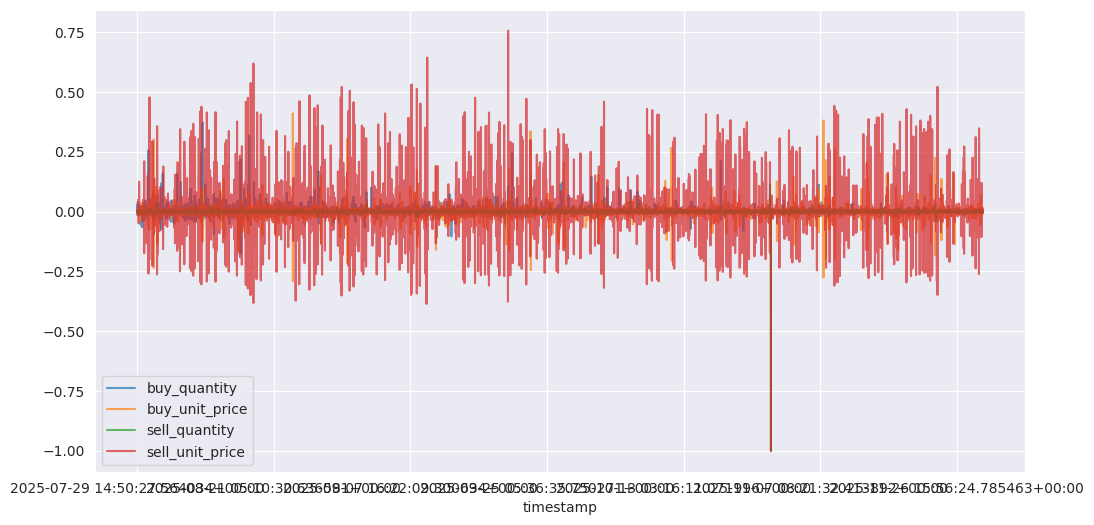

In [17]:
import matplotlib.pyplot as plt
# Matplotlib is faster than seaborn for simple line plots
data[1].drop(columns=['item_id']).plot(figsize=(12, 6), alpha=0.7)
plt.show()

In [ ]:
data